In [150]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
columns = ['index', 'ID', 'date', 'query', 'user', 'Text']
tweet = pd.read_csv("c:\\Users\\santi\\Downloads\\ProjectTweets.csv",header=None,names=columns)
tweet.head(2)


,index,ID,date,query,user,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


In [151]:
#check query values
if len(tweet['query'].unique()) <2:
    print("query only has 1 value, dropping query field")
    tweet = tweet[[ 'ID', 'date', 'user','Text']]
    print(tweet.columns)

query only has 1 value, dropping query field
Index(['ID', 'date', 'user', 'Text'], dtype='object')


In [152]:
#duplicates
tweet = tweet.drop_duplicates()
tweet.head(2)

,ID,date,user,Text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...


In [153]:
#format date
tweet = tweet[['date','Text']]

date_format = "%a %b %d %H:%M:%S PDT %Y"
# Convert to datetime 
tweet['date'] = pd.to_datetime(tweet['date'], format=date_format)
print(tweet['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1598315, dtype: datetime64[ns]


In [154]:
#checking hashtags
import re

def hashtags(tweet):
    hashtags = re.findall(r'#\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
hashtags_list = tweet['Text'].apply(hashtags).explode()
hashtags_list = hashtags_list.value_counts()
print(f'total hashtag: {len(hashtags_list)}')
hashtags_list[:20] #top 20 hashtags

total hashtag: 13653


#followfriday       2112
#fb                 1744
#squarespace         887
#FF                  586
#1                   519
#seb                 499
#FollowFriday        463
#musicmonday         404
#ff                  399
#iranelection        359
#2                   341
#fail                301
#BSB                 299
#myweakness          269
#iremember           268
#asot400             264
#marsiscoming        248
#mcflyforgermany     230
#andyhurleyday       188
#iPhone              185
Name: Text, dtype: int64

In [155]:
def tag(tweet):
    hashtags = re.findall(r'@\w+', tweet)
    return hashtags

# Apply the function to the 'tweet' column and flatten the list of hashtags
tag_list = tweet['Text'].apply(tag).explode()
tag_list = tag_list.value_counts()
print(f'total tag: {len(tag_list)}')
top1000_tag = tag_list[:1000] #top 10 hashtags

total tag: 356113


#### TextBlob vs Vader

In [156]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def polarity_Vader(x):
    return sia.polarity_scores(x)["compound"]



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [157]:
tweet['score_V'] = tweet['Text'].apply(lambda x: polarity_Vader(x))

In [158]:
#text blob
from textblob import TextBlob

def Polarity_Blob(x):
    return TextBlob(x).sentiment.polarity

tweet['score_T'] = tweet['Text'].apply(lambda x: Polarity_Blob(x))

In [159]:
tweet[['score_V','score_T']].describe()

,score_V,score_T
count,1.598315e+06,1.598315e+06
mean,1.410228e-01,1.022595e-01
std,4.571913e-01,3.523554e-01
min,-9.985000e-01,-1.000000e+00
25%,-7.720000e-02,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,5.267000e-01,3.000000e-01
max,9.987000e-01,1.000000e+00


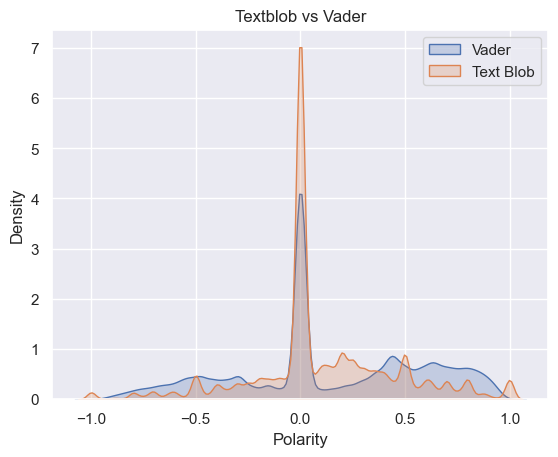

In [160]:
#plot Blob vs vader
sns.set(style="darkgrid")
sns.kdeplot(data=tweet['score_V'], label="Vader", shade=True)
sns.kdeplot(data=tweet['score_T'], label="Text Blob", shade=True)
plt.xlabel("Polarity")
plt.title("Textblob vs Vader")
plt.legend()
plt.show()

Text blob seems to pick up way more tweets as neutral than Vader

In [161]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598315 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   date     1598315 non-null  datetime64[ns]
 1   Text     1598315 non-null  object        
 2   score_V  1598315 non-null  float64       
 3   score_T  1598315 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 61.0+ MB


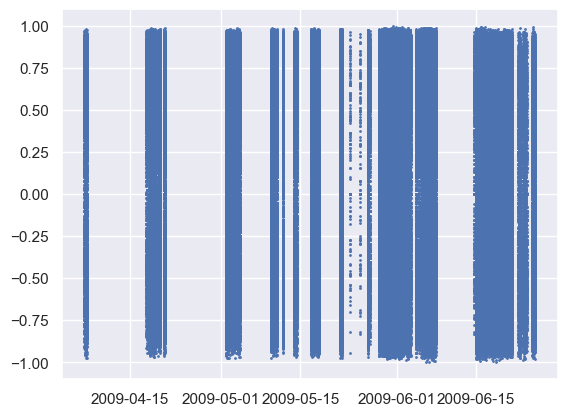

In [162]:
#checking null values in time serie
plt.scatter(tweet['date'], tweet['score_V'], marker='o',s=1)

In [163]:
tweet_2 = tweet.set_index('date')
tweet_2

,Text,score_V,score_T
date,,,
2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",-0.0173,0.216667
2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,-0.7500,0.000000
2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,0.4939,0.500000
2009-04-06 22:19:57,my whole body feels itchy and like its on fire,-0.2500,0.200000
2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",-0.6597,-0.625000
...,...,...,...
2009-06-16 08:40:49,Just woke up. Having no school is the best fee...,0.5423,1.000000
2009-06-16 08:40:49,TheWDB.com - Very cool to hear old Walt interv...,0.4376,0.290000
2009-06-16 08:40:49,Are you ready for your MoJo Makeover? Ask me f...,0.3612,0.200000


In [164]:
tweet_2 = tweet_2.groupby(pd.Grouper(freq='H')).mean()

Text(0.5, 1.0, 'Hourly average')

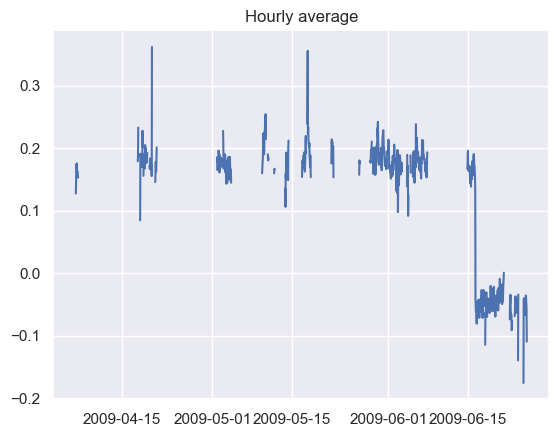

In [165]:
plt.plot(tweet_2.index,tweet_2['score_V'])
plt.title('Hourly average')

Text(0.5, 1.0, 'Daily average')

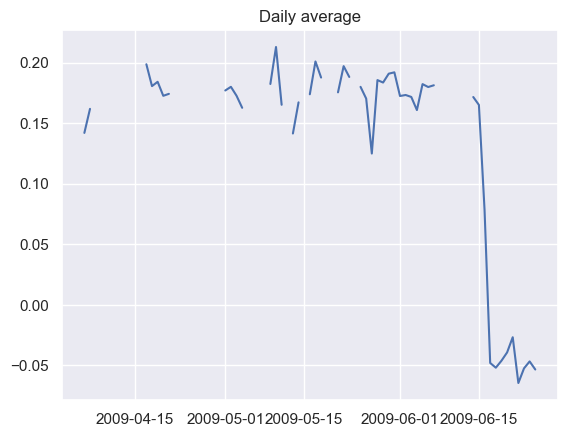

In [166]:
tweet_3 = tweet.set_index('date').groupby(pd.Grouper(freq='D')).mean()
plt.plot(tweet_3.index,tweet_3['score_V'])
plt.title("Daily average")

Text(0.5, 1.0, 'Minute average')

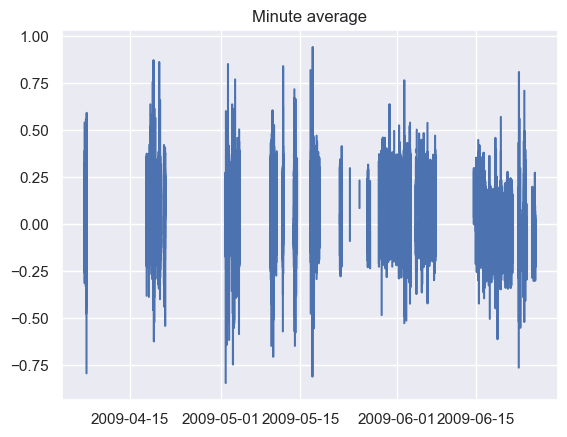

In [186]:
tweet_4 = tweet.set_index('date').groupby(pd.Grouper(freq='T')).mean()
plt.plot(tweet_4.index,tweet_4['score_V'])
plt.title("Minute average")

In [193]:
print(f' aggregate by Day percentage of null: {round(tweet_3.score_V.isna().sum()/len(tweet_3),2)}')
print(f' aggregate by Hour percentage of null: {round(tweet_2.score_V.isna().sum()/len(tweet_2),2)}')
print(f' aggregate by Minute percentage of null: {round(tweet_4.score_V.isna().sum()/len(tweet_4),2)}')

 aggregate by Day percentage of null: 0.41
 aggregate by Hour percentage of null: 0.69
 aggregate by Minute percentage of null: 0.75


aggregate by day is probably the way to go if we want to insert missing values as if we go from day to hour we get amost double of the amount of missing data as %

#### Checking speficic tags/mentions

In [167]:
filtered_tweets = pd.DataFrame(columns=['date','Text'])

for tag in top1000_tag.index:
    songs = tweet[tweet['Text'].str.contains(tag)]
    filtered_tweets = filtered_tweets.append(songs)


In [168]:
filtered_tweets.shape

(106093, 4)

In [169]:
filtered_tweets['Mentions'] = filtered_tweets['Text'].str.extract(r'@(\w+)')
filtered_tweets['Text'] = filtered_tweets['Text'].str.replace(r'@\w+', '')
filtered_tweets

,date,Text,score_V,score_T,Mentions
1021,2009-04-06 23:30:57,hahaha dont be like that one time in NY when ...,0.6090,0.088988,mileycyrus
2014,2009-04-07 00:45:20,"i have the same problem, but it's 4:43 here.....",-0.6049,0.000000,mileycyrus
2073,2009-04-07 00:49:07,I guess counting sheep didn't work Hope you ...,-0.4015,0.000000,mileycyrus
2080,2009-04-07 00:49:44,I would too if it meant spending a day in hea...,0.5106,0.000000,mileycyrus
2156,2009-04-07 00:56:41,AWWW u seriously have the cutest dog Miley! S...,0.8829,-0.213889,mileycyrus
...,...,...,...,...,...
1374702,2009-06-05 22:06:44,Hey guess what? I just became a member,0.0000,0.000000,JoannaAngel
1439981,2009-06-06 21:11:11,"whoops, *your - twitter typos are almost as e...",-0.3230,0.000000,JoannaAngel
1458236,2009-06-07 03:31:49,Tragic thing is you're actually funnier than ...,-0.0772,-0.375000,JoannaAngel
1561203,2009-06-15 18:58:10,hey so whats going on tomorrow night?,0.0000,0.000000,JoannaAngel


In [170]:
filtered_tweets

,date,Text,score_V,score_T,Mentions
1021,2009-04-06 23:30:57,hahaha dont be like that one time in NY when ...,0.6090,0.088988,mileycyrus
2014,2009-04-07 00:45:20,"i have the same problem, but it's 4:43 here.....",-0.6049,0.000000,mileycyrus
2073,2009-04-07 00:49:07,I guess counting sheep didn't work Hope you ...,-0.4015,0.000000,mileycyrus
2080,2009-04-07 00:49:44,I would too if it meant spending a day in hea...,0.5106,0.000000,mileycyrus
2156,2009-04-07 00:56:41,AWWW u seriously have the cutest dog Miley! S...,0.8829,-0.213889,mileycyrus
...,...,...,...,...,...
1374702,2009-06-05 22:06:44,Hey guess what? I just became a member,0.0000,0.000000,JoannaAngel
1439981,2009-06-06 21:11:11,"whoops, *your - twitter typos are almost as e...",-0.3230,0.000000,JoannaAngel
1458236,2009-06-07 03:31:49,Tragic thing is you're actually funnier than ...,-0.0772,-0.375000,JoannaAngel
1561203,2009-06-15 18:58:10,hey so whats going on tomorrow night?,0.0000,0.000000,JoannaAngel


In [171]:
#comparing 2 mentions by average score
filtered_tweets[(filtered_tweets['Mentions'] == "mileycyrus") | (filtered_tweets['Mentions'] == "taylorswift13")].groupby('Mentions')['score_V'].mean()

Mentions
mileycyrus       0.412803
taylorswift13    0.391100
Name: score_V, dtype: float64

Dropping the idea for modelling based on mentions or hashtags, data is already butchered and subsetting for themes would only make things worst...it would be interesting as descriptive statistics for comparing mentions of hashtags